jupyter nbconvert --to slides --reveal-prefix "http://lab.hakim.se/reveal-js/"

In [3]:
import pods
import mlai
from matplotlib import pyplot as plt
%matplotlib inline

# Introduction to Machine Learning and Data Science

### Data Science in Africa Summer School

### Makerere University, Kampala, Uganda

### Neil D. Lawrence

### 27th June 2016

# Text

<img src="diagrams/a-first-course-in-machine-learning.jpg" height=100% align=center>

@Rogers:book11


# Another Text


![](diagrams/978-0-387-31073-2.png)

@Bishop:book06


# What is Machine Learning?


**<center>data + model = prediction</center>**

 -   **data** : observations, could be actively or passively
    acquired (meta-data).

 -   **model** : assumptions, based on previous experience (other data!
    transfer learning etc), or beliefs about the regularities of
    the universe. Inductive bias.

 -   **prediction** : an action to be taken or a categorization or a
    quality score.


# Fitting Data

- **data**

In [3]:
import numpy as np

# Create some data
x = np.array([1, 3])
y = np.array([3, 1])

- **model**
$$y=mx + c$$

# Model Fitting

$$m = \frac{y_2- y_1}{x_2-x_1}$$
$$ c = y_1 - m x_1 $$

In [4]:
xvals = np.linspace(0, 5, 2);

m = (y[1]-y[0])/(x[1]-x[0]);
c = y[0]-m*x[0];

yvals = m*xvals+c;

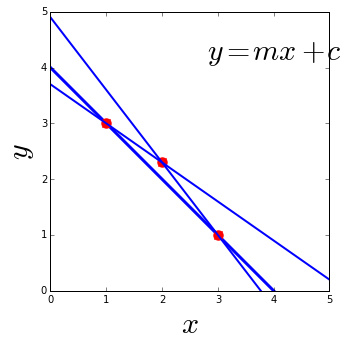

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

xvals = np.linspace(0, 5, 2);

m = (y[1]-y[0])/(x[1]-x[0]);
c = y[0]-m*x[0];

yvals = m*xvals+c;

ylim = np.array([0, 5])
xlim = np.array([0, 5])

f, ax = plt.subplots(1,1,figsize=(5,5))
a = ax.plot(xvals, yvals, '-', linewidth=3);

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.xlabel('$x$', fontsize=30)
plt.ylabel('$y$',fontsize=30)
plt.text(4, 4, '$y=mx+c$',  horizontalalignment='center', verticalalignment='bottom', fontsize=30)
plt.savefig('diagrams/straight_line1.svg')
ctext = ax.text(0.15, c+0.15, '$c$',  horizontalalignment='center', verticalalignment='bottom', fontsize=20)
xl = np.array([1.5, 2.5])
yl = xl*m + c;
mhand = ax.plot([xl[0], xl[1]], [yl.min(), yl.min()], color=[0, 0, 0])
mhand2 = ax.plot([xl.min(), xl.min()], [yl[0], yl[1]], color=[0, 0, 0])
mtext = ax.text(xl.mean(), yl.min()-0.2, '$m$',  horizontalalignment='center', verticalalignment='bottom',fontsize=20);
plt.savefig('diagrams/straight_line2.svg')

a2 = ax.plot(x, y, '.', markersize=20, linewidth=3, color=[1, 0, 0])
plt.savefig('diagrams/straight_line3.svg')

xs = 2
ys = m*xs + c + 0.3

ast = ax.plot(xs, ys, '.', markersize=20, linewidth=3, color=[0, 1, 0])
plt.savefig('diagrams/straight_line4.svg')


m = (y[1]-ys)/(x[1]-xs);
c = ys-m*xs;
yvals = m*xvals+c;

for i in a:
    i.set_visible(False)
for i in mhand:
    i.set_visible(False)
for i in mhand2:
    i.set_visible(False)
mtext.set_visible(False)
ctext.set_visible(False)
a3 = ax.plot(xvals, yvals, '-', linewidth=2, color=[0, 0, 1])
for i in ast:
    i.set_color([1, 0, 0])
plt.savefig('diagrams/straight_line5.svg')

m = (ys-y[0])/(xs-x[0])
c = y[0]-m*x[0]
yvals = m*xvals+c

for i in a3:
    i.set_visible(False)
a4 = ax.plot(xvals, yvals, '-', linewidth=2, color=[0, 0, 1]);
for i in ast:
    i.set_color([1, 0, 0])
plt.savefig('diagrams/straight_line6.svg')
for i in a:
    i.set_visible(True)
for i in a3:
    i.set_visible(True)
plt.savefig('diagrams/straight_line7.svg')


In [6]:
import pods
pods.notebook.display_plots('straight_line{plot}.svg', 
                            directory='./diagrams', plot=(1, 7))


# $y = mx + c$

point 1: $x = 1$, $y=3$ $$3 = m + c$$ 
point 2: $x = 3$, $y=1$ $$1 = 3m + c$$ 
point 3: $x = 2$, $y=2.5$ $$2.5 = 2m + c$$

<img src="diagrams/Pierre-Simon_Laplace.png" align=center width=50%>

<img src="diagrams/laplacesDeterminismFrench.png" align=center width=50%>

<img src="diagrams/laplacesDeterminismEnglish.png" align=center width=50%>

<img src="diagrams/philosophicaless00lapliala.png" height=800>

# $y = mx + c + \epsilon$

point 1: $x = 1$, $y=3$ 
$$3 = m + c + \epsilon_1$$ 

point 2: $x = 3$, $y=1$ 
$$1 = 3m + c + \epsilon_2$$ 

point 3: $x = 2$, $y=2.5$ 
$$2.5 = 2m + c + \epsilon_3$$

### Regression Examples

-   Predict a real value, $y_i$ given some inputs
    $x_i$.

-   Predict quality of meat given spectral measurements (Tecator data).

-   Radiocarbon dating, the C14 calibration curve: predict age given
    quantity of C14 isotope.

-   Predict quality of different Go or Backgammon moves given expert
    rated training data.


### Olympic 100m Data

-  Gold medal times for Olympic 100 m runners since 1896.

![image](./diagrams/100m_final_start.jpg)
Image from Wikimedia Commons <http://bit.ly/191adDC>

### Olympic 100m Data


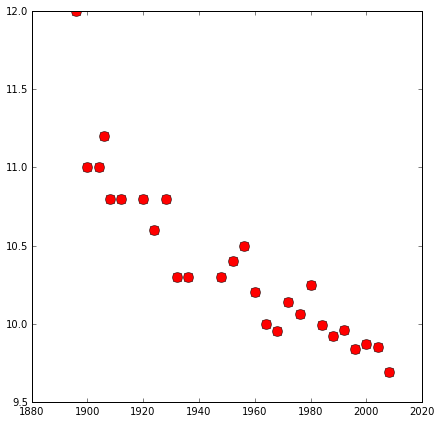

In [3]:
data = pods.datasets.olympic_100m_men()
f, ax = plt.subplots(figsize=(7,7))
ax.plot(data['X'], data['Y'], 'ro', markersize=10)

### Olympic Marathon Data


![image](./diagrams/Stephen_Kiprotich.jpg)
Image from Wikimedia Commons <http://bit.ly/16kMKHQ>


### Olympic Marathon Data

-   Gold medal times for Olympic Marathon since 1896.

-   Marathons before 1924 didn’t have a standardised distance.

-   Present results using pace per km.

-   In 1904 Marathon was badly organised leading to very slow times.

### Olympic Marathon Data


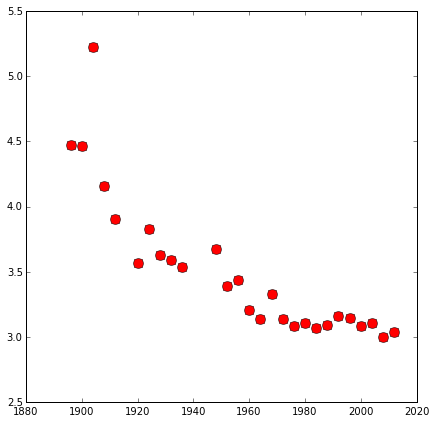

In [4]:
data = pods.datasets.olympic_marathon_men()
f, ax = plt.subplots(figsize=(7,7))
ax.plot(data['X'], data['Y'], 'ro',markersize=10)

### What is Machine Learning?

$$ \text{data} + \text{model} = \text{prediction}$$

-   $\text{data}$ : observations, could be actively or passively
    acquired (meta-data).

-   $\text{model}$ : assumptions, based on previous experience (other data!
    transfer learning etc), or beliefs about the regularities of
    the universe. Inductive bias.

-   $\text{prediction}$ : an action to be taken or a categorization or a
    quality score.


### Regression: Linear Releationship

$$y_i = m x_i + c$$

-   $y_i$ : winning time/pace.

-   $x_i$ : year of Olympics.

-   $m$ : rate of improvement over time.

-   $c$ : winning time at year 0.

# Overdetermined System

![](diagrams/straight_line7.svg)

# $y = mx + c$

point 1: $x = 1$, $y=3$ $$3 = m + c$$ 
point 2: $x = 3$, $y=1$ $$1 = 3m + c$$ 
point 3: $x = 2$, $y=2.5$ $$2.5 = 2m + c$$

<img src="diagrams/Pierre-Simon_Laplace.png" align=center width=50%>

# $y = mx + c + \epsilon$

point 1: $x = 1$, $y=3$ 
$$3 = m + c + \epsilon_1$$ 

point 2: $x = 3$, $y=1$ 
$$1 = 3m + c + \epsilon_2$$ 

point 3: $x = 2$, $y=2.5$ 
$$2.5 = 2m + c + \epsilon_3$$

### The Gaussian Density
- Perhaps the most common probability density.
\begin{align*}
p(y| \mu, \sigma^2) & = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(y - \mu)^2}{2\sigma^2}\right)\\
& \buildrel\triangle\over = \mathcal{N}(y|\mu, \sigma^2)
\end{align*}
- The Gaussian density.


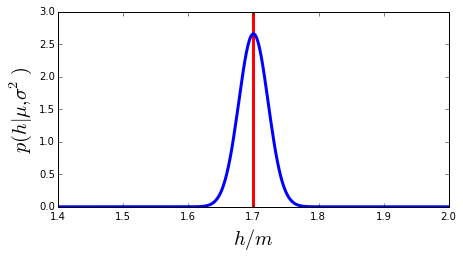

In [5]:
import numpy as np
h = np.linspace(0, 2.5, 1000)
sigma2 = 0.0225
mu = 1.7
p = 1./np.sqrt(2*np.pi*sigma2)*np.exp(-(h-mu)**2/(2*sigma2**2))
f2, ax2 = plt.subplots(figsize=(7, 3.5))
ax2.plot(h, p, 'b-', linewidth=3)
ylim = (0, 3)
ax2.vlines(mu, ylim[0], ylim[1], colors='r', linewidth=3)
ax2.set_ylim(ylim)
ax2.set_xlim(1.4, 2.0)
ax2.set_xlabel('$h/m$', fontsize=20)
ax2.set_ylabel('$p(h|\mu, \sigma^2)$', fontsize = 20)
f2.savefig('./diagrams/gaussian_of_height.svg')

### Gaussian Density
![](./diagrams/gaussian_of_height.svg)
The Gaussian PDF with $\mu=1.7$ and variance $\sigma^2=
  0.0225$. Mean shown as red line. It could represent the heights of a population of
  students.

### Gaussian Density
$$
\mathcal{N}(y|\mu, \sigma^2) =  \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y-\mu)^2}{2\sigma^2}\right)
$$
$\sigma^2$ is the variance of the density and $\mu$ is the mean.


### Laplace's Idea

### A Probabilistic Process

-   Set the mean of Gaussian to be a function.
    $$p\left(y_i|x_i\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp \left(-\frac{\left(y_i-f\left(x_i\right)\right)^{2}}{2\sigma^2}\right).$$

-   This gives us a ‘noisy function’.

-   This is known as a stochastic process.

### Height as a Function of Weight

-   In the standard Gaussian, parametized by mean and variance.

-   Make the mean a linear function of an *input*.

-   This leads to a regression model. 
    \begin{align*}
       y_i=&f\left(x_i\right)+\epsilon_i,\\
         \epsilon_i \sim &\mathcal{N}(0, \sigma^2).
     \end{align*}
        
-   Assume $y_i$ is height and $x_i$ is weight.

### Data Point Likelihood

-   Likelihood of an individual data point
    $$p\left(y_i|x_i,m,c\right)=\frac{1}{\sqrt{2\pi \sigma^2}}\exp \left(-\frac{\left(y_i-mx_i-c\right)^{2}}{2\sigma^2}\right).$$

-   Parameters are gradient, $m$, offset, $c$ of the function and noise
    variance $\sigma^2$.

### Data Set Likelihood

-   If the noise, $\epsilon_i$ is sampled independently for each
    data point.

-   Each data point is independent (given $m$ and $c$).

-   For independent variables:
    $$p(\mathbf{y}) = \prod_{i=1}^n p(y_i)$$
    $$p(\mathbf{y}|\mathbf{x}, m, c) = \prod_{i=1}^n p(y_i|x_i, m, c)$$
    

### For Gaussian 

- i.i.d. assumption
    
    $$p(\mathbf{y}|\mathbf{x}, m, c) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}}\exp \left(-\frac{\left(y_i-mx_i-c\right)^{2}}{2\sigma^2}\right).$$
    $$p(\mathbf{y}|\mathbf{x}, m, c) = \frac{1}{\left(2\pi \sigma^2\right)^{\frac{n}{2}}}\exp \left(-\frac{\sum_{i=1}^n\left(y_i-mx_i-c\right)^{2}}{2\sigma^2}\right).$$

### Log Likelihood Function

-   Normally work with the log likelihood:
    $$L(m,c,\sigma^{2})=-\frac{n}{2}\log 2\pi -\frac{n}{2}\log \sigma^2 -\sum _{i=1}^{n}\frac{\left(y_i-mx_i-c\right)^{2}}{2\sigma^2}.$$

### Error Function

-   Negative log likelihood is the error function leading to an error
    function
    $$E(m,c,\sigma^{2})=\frac{n}{2}\log \sigma^2 +\frac{1}{2\sigma^2}\sum _{i=1}^{n}\left(y_i-mx_i-c\right)^{2}.$$

-   Learning proceeds by minimizing this error function for the data
    set provided.

### Connection: Sum of Squares Error

-   Ignoring terms which don’t depend on $m$ and $c$ gives
    $$E(m, c) \propto \sum_{i=1}^n (y_i - f(x_i))^2$$
    where $f(x_i) = mx_i + c$.

-   This is known as the *sum of squares* error function.

-   Commonly used and is closely associated with the
    Gaussian likelihood.

## Reminder

- Two functions involved:
  - Prediction function: $f(x_i)$
  - Error, or Objective function: $E(m, c)$
- Error function depends on parameters through prediction function.

### Mathematical Interpretation

-   What is the mathematical interpretation?

    -   There is a cost function.

    -   It expresses mismatch between your prediction and reality.
        $$E(m, c)=\sum_{i=1}^n \left(y_i - mx_i -c\right)^2$$

    -   This is known as the sum of squares error.

### Nonlinear Regression

-   Problem with Linear Regression—$\mathbf{x}$ may not be linearly
    related to $\mathbf{y}$.

-   Potential solution: create a feature space: define
    $\phi(\mathbf{x})$ where $\phi(\cdot)$ is a
    nonlinear function of $\mathbf{x}$.

-   Model for target is a linear combination of these nonlinear
    functions
    $$f(\mathbf{x}) = \sum_{j=1}^k w_j \phi_j(\mathbf{x})$$

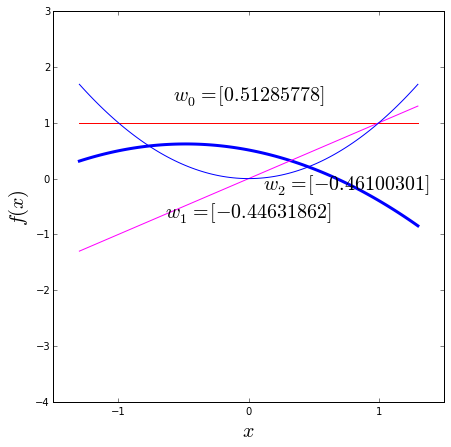

In [5]:
f, ax = plt.subplots(figsize=(7, 7))

loc =[[0, 1.4,],
      [0, -0.7],
      [0.75, -0.2]]
text =['$\phi(x) = 1$',
       '$\phi(x) = x$',
       '$\phi(x) = x^2$']
mlai.plot_basis(mlai.polynomial, x_min=-1.3, x_max=1.3, fig=f, ax=ax, loc=loc, text=text)    


### Quadratic Basis

-   Basis functions can be global. E.g. quadratic basis:
    $$\boldsymbol{\phi} = [1, x, x^2]$$
    


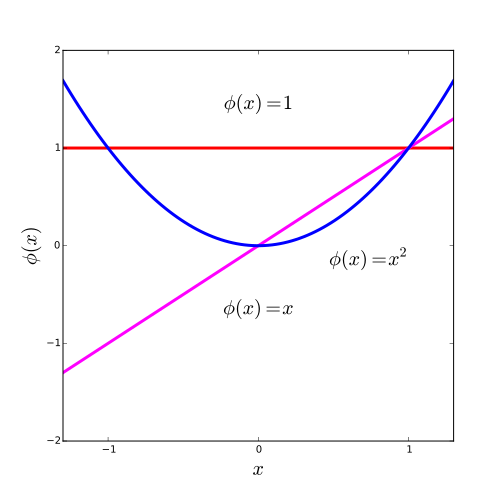

In [6]:
pods.notebook.display_plots('polynomial_basis{num_basis}.svg', directory='./diagrams', num_basis=(1,3))

### Functions Derived from Quadratic Basis

$$f(x) = {\color{\redColor}w_0} + {\color{\magentaColor}w_1x} + {\color{\blueColor}w_2 x^2}$$



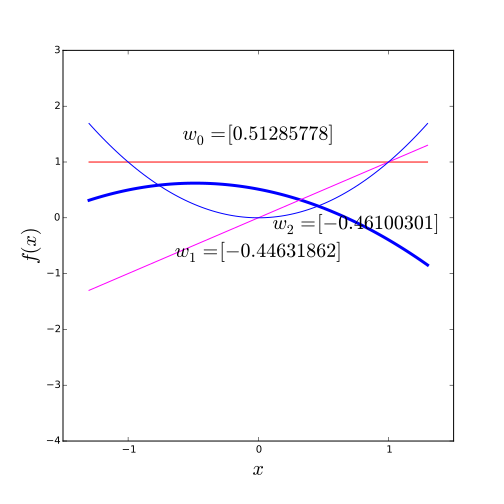

In [7]:
pods.notebook.display_plots('polynomial_function{func_num}.svg', directory='./diagrams', func_num=(1,3))

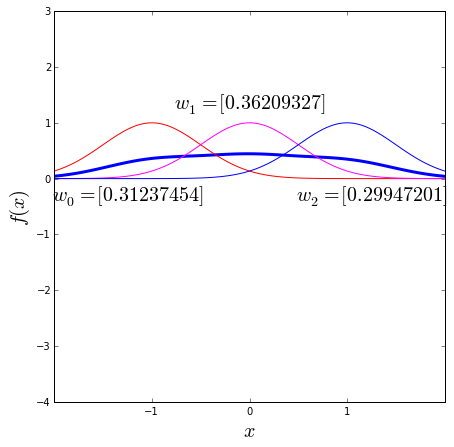

In [5]:
f, ax = plt.subplots(figsize=(7, 7))

loc = [[-1.25, -0.4],
       [0., 1.25],
       [1.25, -0.4]]
text = ['$\phi_1(x) = e^{-(x + 1)^2}$',
        '$\phi_2(x) = e^{-2x^2}$', 
        '$\phi_3(x) = e^{-2(x-1)^2}$']
mlai.plot_basis(mlai.radial, x_min=-2, x_max=2, fig=f, ax=ax, loc=loc, text=text)    


### Radial Basis Functions

-   Or they can be local. E.g. radial (or Gaussian) basis
    $$\phi_j(x) = \exp\left(-\frac{(x-\mu_j)^2}{\ell^2}\right)$$


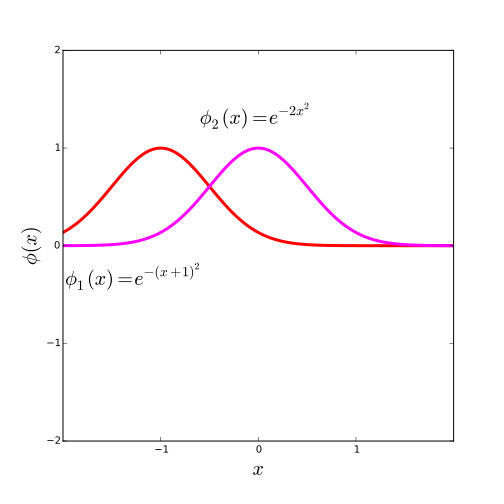

In [8]:
pods.notebook.display_plots('radial_basis{num_basis}.svg', directory='./diagrams', num_basis=(1,3))

### Functions Derived from Radial Basis

$$f(x) = {\color{\redColor}w_1 e^{-2(x+1)^2}}  + {\color{\magentaColor}w_2e^{-2x^2}} + {\color{\blueColor}w_3 e^{-2(x-1)^2}}$$

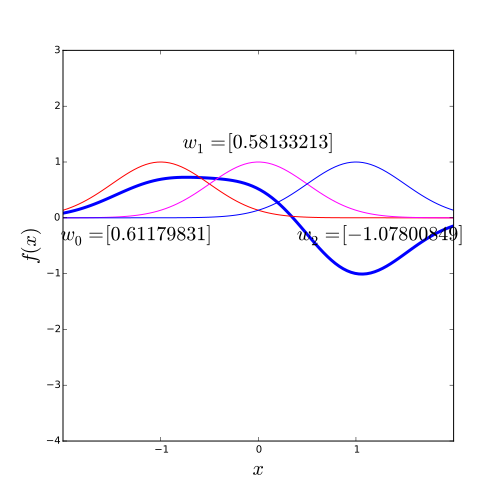

In [10]:
pods.notebook.display_plots('radial_function{func_num}.svg', directory='./diagrams', func_num=(1,3))

### Basis Function Models

-   The *prediction function* is now defined as
    $$f(\mathbf{x}_i) = \sum_{j=1}^m w_j \phi_{i, j}$$


## Vector Notation

-   Write in vector notation,
    $$f(\mathbf{x}_i) = \mathbf{w}^\top \boldsymbol{\phi}_i$$

### Log Likelihood for Basis Function Model

-   The likelihood of a single data point is
    $$p\left(y_i|x_i\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp
        \left(-\frac{\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}\right).$$

### Log Likelihood for Basis Function Model

-   Leading to a log likelihood for the data set of
    $$L(\mathbf{w},\sigma^2)= -\frac{n}{2}\log \sigma^2
          -\frac{n}{2}\log 2\pi -\frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}.$$

 

### Objective Function

- And a corresponding *objective function* of the form
    $$E(\mathbf{w},\sigma^2)= \frac{n}{2}\log
          \sigma^2 + \frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}.$$

### Polynomial Fits to Olympic Data

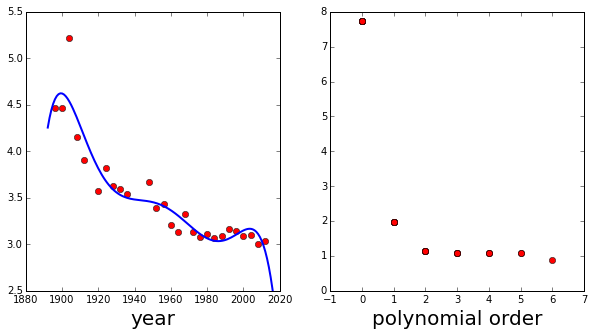

In [8]:
basis = mlai.polynomial

data = pods.datasets.olympic_marathon_men()
f, ax = plt.subplots(1, 2, figsize=(10,5))
x = data['X']
y = data['Y']

data_limits = [1892, 2020]
max_basis = 7

ll = np.array([np.nan]*(max_basis))
sum_squares = np.array([np.nan]*(max_basis))

for num_basis in range(1,max_basis+1):
    
    model= mlai.LM(x, y, basis, num_basis=num_basis, data_limits=data_limits)
    model.fit()
    sum_squares[num_basis-1] = model.objective() 
    ll[num_basis-1] = model.log_likelihood()
    mlai.plot_marathon_fit(model=model, data_limits=data_limits, 
                           objective=sum_squares, objective_ylim=[0,8],
                           fig=f, ax=ax)


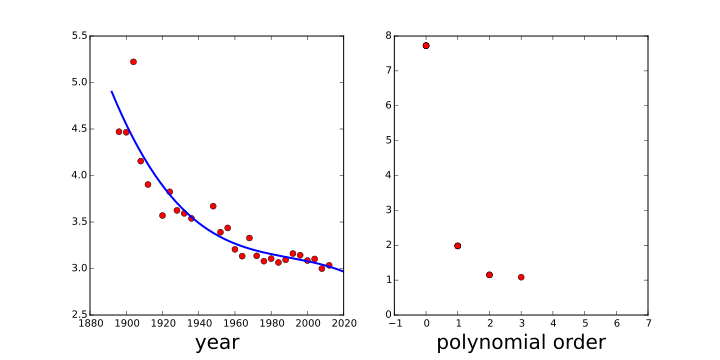

In [11]:
pods.notebook.display_plots('olympic_LM_polynomial{num_basis}.svg', directory='./diagrams', num_basis=(1,7))

### Polynomial Fits to Olymics Data

In [14]:
import pods
import numpy as np
import scipy as sp
import mlai
from matplotlib import pyplot as plt
max_basis = 7
basis = mlai.polynomial

data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

data_limits = [1892, 2020]
num_data = x.shape[0]


In [2]:
f, ax = plt.subplots(1, 2, figsize=(10,5))

ll = np.array([np.nan]*(max_basis))
sum_squares = np.array([np.nan]*(max_basis))

for num_basis in range(1,max_basis+1):
    
    model= mlai.LM(x, y, basis, num_basis=num_basis, data_limits=data_limits)
    model.fit()
    sum_squares[num_basis-1] = model.objective()/num_data 
    ll[num_basis-1] = model.log_likelihood()
    mlai.plot_marathon_fit(model=model, data_limits=data_limits, 
                           objective=np.sqrt(sum_squares), objective_ylim=[0, 0.3],
                           title='Root Mean Square Training Error',
                           fig=f, ax=ax)


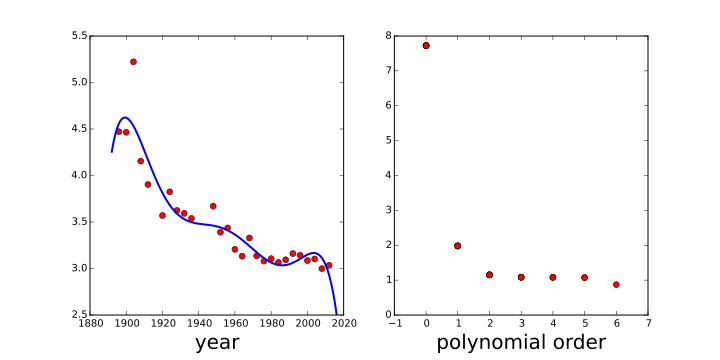

In [15]:
pods.notebook.display_plots('olympic_LM_polynomial{num_basis}.svg', 
                            directory='./diagrams', num_basis=(1, max_basis))

### Overfitting
- Increase number of basis functions we obtain a better 'fit' to the data.
- How will the model perform on previously unseen data?
- Let's consider predicting the future.

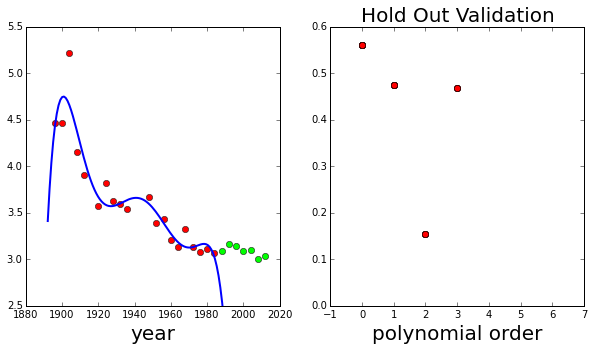

In [17]:
f, ax = plt.subplots(1, 2, figsize=(10,5))

val_start = 20;
x = data['X'][:val_start, :]
x_val = data['X'][val_start:, :]
y = data['Y'][:val_start, :]
y_val = data['Y'][val_start:, :]
num_val_data = x_val.shape[0]
 

ll = np.array([np.nan]*(max_basis))
ss = np.array([np.nan]*(max_basis))
ss_val = np.array([np.nan]*(max_basis))
for num_basis in range(1,max_basis+1):
    
    model= mlai.LM(x, y, basis, num_basis=num_basis, data_limits=data_limits)
    model.fit()
    ss[num_basis-1] = model.objective()
    f_val, _ = model.predict(x_val)
    ss_val[num_basis-1] = ((y_val-f_val)**2).mean() 
    ll[num_basis-1] = model.log_likelihood()
    mlai.plot_marathon_fit(model=model, data_limits=data_limits, 
                           objective=np.sqrt(ss_val), objective_ylim=[0,0.6],
                           fig=f, ax=ax, prefix='olympic_val',
                           title="Hold Out Validation",
                           x_val=x_val, y_val=y_val)

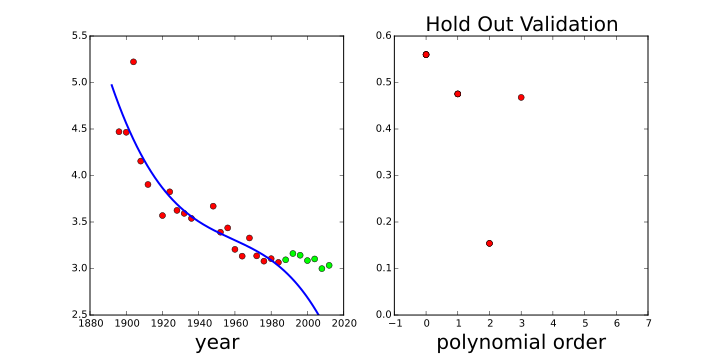

In [18]:
pods.notebook.display_plots('olympic_val_LM_polynomial{num_basis}.svg', 
                            directory='./diagrams', num_basis=(1, max_basis))

### Extrapolation

- Here we are training beyond where the model has learnt.
- This is known as *extrapolation*.
- Extrapolation is predicting into the future here, but could be:
    - Predicting back to the unseen past (pre 1892)
    - Spatial prediction (e.g. Cholera rates outside Manchester given rates inside Manchester).

### Alan Turing
- He was a formidable Marathon runner. 
- In 1946 he ran a time 2 hours 46 minutes.
- What is the probability he would have won an Olympics if one had been held in 1946?  
![Alan Turing running in 1946](./diagrams/turing_run.jpg)
<center>*Alan Turing, in 1946 he was only 11 minutes slower than the winner of the 1948 games. Would he have won a hypothetical games held in 1946? Source: [Alan Turing Internet Scrapbook](http://www.turing.org.uk/scrapbook/run.html).*</center>


### Interpolation
- Predicting the wining time for 1946 Olympics is *interpolation*.
- This is because we have times from 1936 and 1948.
- If we want a model for *interpolation* how can we test it?
- One trick is to sample the validation set from throughout the data set.

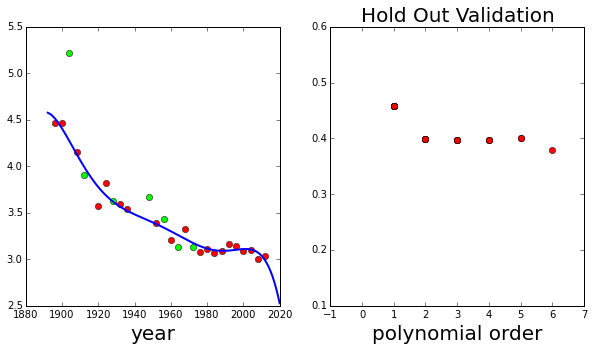

In [19]:
f, ax = plt.subplots(1, 2, figsize=(10,5))

val_start = 20;

perm = np.random.permutation(data['X'].shape[0])
x = data['X'][perm[:val_start], :]
x_val = data['X'][perm[val_start:], :]
y = data['Y'][perm[:val_start], :]
y_val = data['Y'][perm[val_start:], :]
num_val_data = x_val.shape[0]
 
    


ll = np.array([np.nan]*(max_basis))
ss = np.array([np.nan]*(max_basis))
ss_val = np.array([np.nan]*(max_basis))
for num_basis in range(1,max_basis+1):
    
    model= mlai.LM(x, y, basis, num_basis=num_basis, data_limits=data_limits)
    model.fit()
    ss[num_basis-1] = model.objective()
    f_val, _ = model.predict(x_val)
    ss_val[num_basis-1] = ((y_val-f_val)**2).mean() 
    ll[num_basis-1] = model.log_likelihood()
    mlai.plot_marathon_fit(model=model, data_limits=data_limits, 
                           objective=np.sqrt(ss_val), objective_ylim=[0.1,0.6],
                           fig=f, ax=ax, prefix='olympic_val_inter',
                           title="Hold Out Validation",
                           x_val=x_val, y_val=y_val)

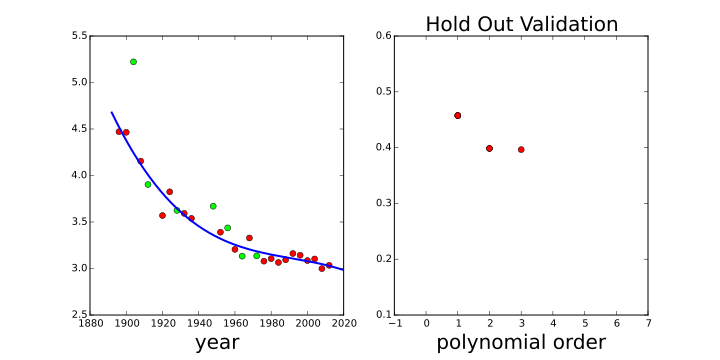

In [20]:
pods.notebook.display_plots('olympic_val_inter_LM_polynomial{num_basis}.svg', 
                            directory='./diagrams', num_basis=(1, max_basis))

### Choice of Validation Set

- The choice of validation set should reflect how you will use the model in practice.
- For extrapolation into the future we tried validating with data from the future.
- For interpolation we chose validation set from data.
- For different validation sets we could get different results.

### Leave One Out Error
- Take training set and remove one point.
- Train on the remaining data.
- Compute the error on the point you removed (which wasn't in the training data).
- Do this for each point in the training set in turn.
- Average the resulting error. 
- This is the leave one out error.

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(10,5))

num_data = data['X'].shape[0]
num_parts = num_data
partitions = []
for part in range(num_parts):
    train_ind = list(range(part))
    train_ind.extend(range(part+1,num_data))
    val_ind = [part]
    partitions.append((train_ind, val_ind))

    ll = np.array([np.nan]*(max_basis))
    ss = np.array([np.nan]*(max_basis))
    ss_val = np.array([np.nan]*(max_basis))
    for num_basis in range(1,max_basis+1):
        ss_val_temp = 0.
        for part, (train_ind, val_ind) in enumerate(partitions):
            x = data['X'][train_ind, :]
            x_val = data['X'][val_ind, :]
            y = data['Y'][train_ind, :]
            y_val = data['Y'][val_ind, :]
            num_val_data = x_val.shape[0]

            model= mlai.LM(x, y, basis, num_basis=num_basis, data_limits=data_limits)
            model.fit()
            ss[num_basis-1] = model.objective()
            f_val, _ = model.predict(x_val)
            ss_val_temp += ((y_val-f_val)**2).mean() 
            mlai.plot_marathon_fit(model=model, data_limits=data_limits, 
                                objective=np.sqrt(ss_val), objective_ylim=[0.1,0.6],
                                   fig=f, ax=ax, prefix='olympic_loo' + str(part) + '_inter',
                                   x_val=x_val, y_val=y_val)
        ss_val[num_basis-1] = ss_val_temp/(num_parts)
        ax[1].cla()
        mlai.plot_marathon_fit(model=model, data_limits=data_limits, 
                                objective=np.sqrt(ss_val), objective_ylim=[0.1,0.6],
                                   fig=f, ax=ax, prefix='olympic_loo' + str(len(partitions)) + '_inter',
                                   title="Leave One Out Validation",
                                   x_val=x_val, y_val=y_val)
        

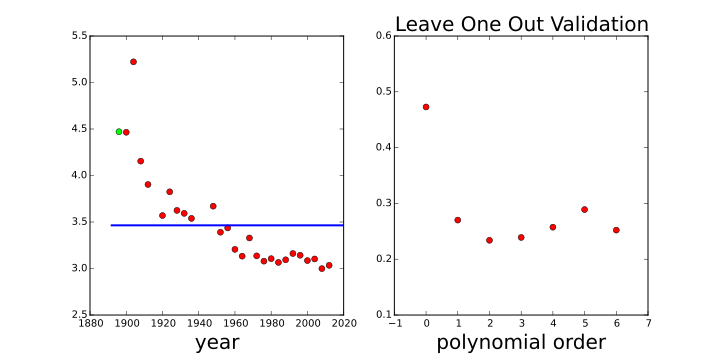

In [22]:
pods.notebook.display_plots('olympic_loo{part}_inter_LM_polynomial{num_basis}.svg', 
                            directory='./diagrams', num_basis=(1, max_basis), part=(0,len(partitions)))

### $k$ Fold Cross Validation

- Leave one out error can be very time consuming.
- Need to train your algorithm $n$ times.
- An alternative: $k$ fold cross validation.

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(10,5))

num_data = data['X'].shape[0]
num_parts = 5
partitions = []
ind = list(np.random.permutation(num_data))
start = 0
for part in range(num_parts):
    end = round((float(num_data)/num_parts)*(part+1))
    train_ind = ind[:start]
    train_ind.extend(ind[end:])
    val_ind = ind[start:end]
    partitions.append((train_ind, val_ind))
    start = end

    
max_basis = 7

ll = np.array([np.nan]*(max_basis))
ss = np.array([np.nan]*(max_basis))
ss_val = np.array([np.nan]*(max_basis))
for num_basis in range(1,max_basis+1):
    ss_val_temp = 0.
    for part, (train_ind, val_ind) in enumerate(partitions):
        x = data['X'][train_ind, :]
        x_val = data['X'][val_ind, :]
        y = data['Y'][train_ind, :]
        y_val = data['Y'][val_ind, :]
        num_val_data = x_val.shape[0]

        model= mlai.LM(x, y, basis, num_basis=num_basis, data_limits=data_limits)
        model.fit()
        ss[num_basis-1] = model.objective()
        f_val, _ = model.predict(x_val)
        ss_val_temp += ((y_val-f_val)**2).mean() 
        mlai.plot_marathon_fit(model=model, data_limits=data_limits, 
                            objective=np.sqrt(ss_val), objective_ylim=[0.2,0.6],
                               fig=f, ax=ax, prefix='olympic_' + str(num_parts) + 'cv' + str(part) + '_inter',
                               title='5-fold Cross Validation',
                               x_val=x_val, y_val=y_val)
    ss_val[num_basis-1] = ss_val_temp/(num_parts)
    ax[1].cla()
    mlai.plot_marathon_fit(model=model, data_limits=data_limits, 
                            objective=np.sqrt(ss_val), objective_ylim=[0.2,0.6],
                            fig=f, ax=ax, prefix='olympic_' + str(num_parts) + 'cv' + str(len(partitions)) + '_inter',
                            title='5-fold Cross Validation',
                            x_val=x_val, y_val=y_val)

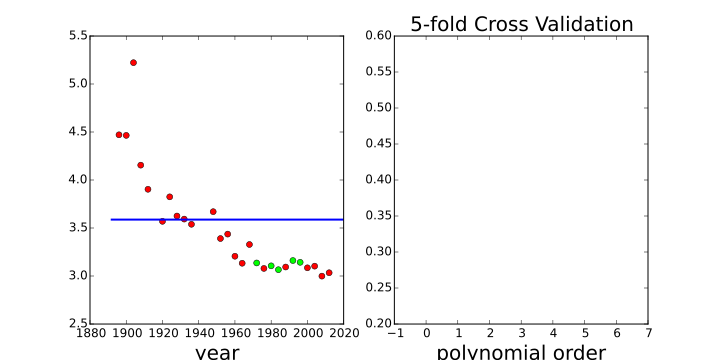

In [24]:
pods.notebook.display_plots('olympic_5cv{part}_inter_LM_polynomial{num_basis}.svg', 
                            directory='./diagrams', num_basis=(1, max_basis), part=(0,5))

### Reading

- Section 1.3-1.5 of @Rogers:book11.
 